In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['retina'] 
import statsmodels.api as sm

import seaborn as sns

In [2]:
info_patents = pd.read_pickle('../info_patents')

In [3]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0
...,...,...,...,...,...,...,...
1915706,D555179,2007-11-13,299,None,[dc77a1b1-f087-4a19-992d-6393caf66347],None,0.0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0


In [4]:
info_patents = info_patents.dropna()

mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(info_patents.ipc_section),columns=mlb.classes_, index=info_patents.index)
dummies = dummies[['A','B','C','D','E','F','G','H']]

for el in list(dummies.columns):
    info_patents[el]=dummies[el]

patents_to_drop = info_patents[(info_patents.A==0) & (info_patents.B==0) & (info_patents.C==0) & (info_patents.D==0) & (info_patents.E==0) & (info_patents.F==0) & (info_patents.G==0) & (info_patents.H==0)].patent_number
info_patents = info_patents[~info_patents.patent_number.isin(list(patents_to_drop))]

info_patents = info_patents[info_patents.patent_processing_time.apply(lambda x: str(x).isdigit())].reset_index(drop=True)

<ipython-input-4-2251a0e745e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_patents[el]=dummies[el]


In [5]:
multi_ipc = [0] * len(info_patents)

In [6]:
for i in list(info_patents.loc[info_patents.ipc_section.apply(lambda x: len(x)>1)].index):
    multi_ipc[i]=1
info_patents["multi_ipc"] = multi_ipc

In [7]:
info_patents

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H,multi_ipc
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0,1
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1,0
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331491,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0,0
1331492,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0,0
1331493,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0,0
1331494,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1,0


In [8]:
info_patents = info_patents[info_patents.patent_date>"2000-01-01"]
info_patents = info_patents[info_patents.patent_date<"2019-01-01"]

In [9]:
info_patents[info_patents.marked==1]
info_patents.patent_processing_time = info_patents.patent_processing_time.astype(int)

In [10]:
max = 0
for i in list(info_patents.loc[info_patents.assignee_id.apply(lambda x: len(x)>1)].index):
    max = max+1 
print(max)

5044


In [11]:
info_companies = pd.read_csv("./Data/info_companies.csv")

In [12]:
info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents,A,B,C,D,E,F,G,H
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002,377,7,630,0,0,0,145,0
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080,42,1,0,0,0,0,3,3
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111,1,0,0,0,0,0,0,0
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056,0,10,0,0,0,0,0,0
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040,269,312,153,6,1,199,1343,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056,1,4,0,0,0,1,0,1
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600,4,0,0,0,0,3,0,0
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250,0,0,0,0,0,0,4,0
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059,34,0,0,0,0,0,0,2


In [13]:
# Transforming the data
scaler = MinMaxScaler()

X = info_patents[['patent_processing_time','A','B','C','D','E','F','G','multi_ipc']]



y = info_patents['marked']
model = sm.Logit(y, X)

result = model.fit_regularized(cov_type="hc0")

print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14679978554022943
            Iterations: 87
            Function evaluations: 95
            Gradient evaluations: 87
                           Logit Regression Results                           
Dep. Variable:                 marked   No. Observations:               901545
Model:                          Logit   Df Residuals:                   901536
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 May 2021   Pseudo R-squ.:                 -0.2667
Time:                        21:14:13   Log-Likelihood:            -1.3235e+05
converged:                       True   LL-Null:                   -1.0448e+05
Covariance Type:                  hc0   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

In [14]:
assignee_id1 = list(info_patents.assignee_id)
for index, i in enumerate(assignee_id1):
    assignee_id1[index] = i[0]
    
info_patents["assignee_id1"] = assignee_id1

In [15]:
test = info_patents.set_index('assignee_id1').join(info_companies.set_index('assignee_id'), rsuffix='_other')

In [16]:
#test = test[test.assignee_total_num_patents>=50]

# Regression 1

In [17]:
scaler = MinMaxScaler()

X = info_patents[['patent_processing_time','A','B','C','D','E','F','G','multi_ipc']]



y = info_patents['marked']
model = sm.Logit(y, X)

result = model.fit_regularized(cov_type="hc0")

print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14679978554022943
            Iterations: 87
            Function evaluations: 95
            Gradient evaluations: 87
                           Logit Regression Results                           
Dep. Variable:                 marked   No. Observations:               901545
Model:                          Logit   Df Residuals:                   901536
Method:                           MLE   Df Model:                            8
Date:                Mon, 31 May 2021   Pseudo R-squ.:                 -0.2667
Time:                        21:14:25   Log-Likelihood:            -1.3235e+05
converged:                       True   LL-Null:                   -1.0448e+05
Covariance Type:                  hc0   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

# Regression 2

In [34]:
test2 = test[test.proportion_marked_patents<0.2]
test2 = test2[test2.assignee_total_num_inventors>3]

# Transforming the data
scaler = MinMaxScaler()

X = test2[['patent_processing_time','A','B','C','D','E','F','G','A_other','B_other','C_other','multi_ipc','assignee_total_num_inventors']]



y = test2['marked']
model = sm.Logit(y, X)

result = model.fit_regularized(cov_type="hc0")

print(result.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05030298185430422
            Iterations: 115
            Function evaluations: 141
            Gradient evaluations: 115
                           Logit Regression Results                           
Dep. Variable:                 marked   No. Observations:               879959
Model:                          Logit   Df Residuals:                   879946
Method:                           MLE   Df Model:                           12
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.1461
Time:                        21:24:34   Log-Likelihood:                -44265.
converged:                       True   LL-Null:                       -51837.
Covariance Type:                  hc0   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [19]:
test.columns

Index(['patent_number', 'patent_date', 'patent_processing_time', 'ipc_section',
       'assignee_id', 'wipos', 'marked', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'multi_ipc', 'assignee_organization', 'assignee_type',
       'assignee_lastknown_country', 'assignee_total_num_patents',
       'assignee_total_num_inventors', 'nb_marked_patents',
       'proportion_marked_patents', 'A_other', 'B_other', 'C_other', 'D_other',
       'E_other', 'F_other', 'G_other', 'H_other'],
      dtype='object')

In [20]:
test.assignee_total_num_inventors.value_counts()

63301    72098
46361    48420
20530    26685
21517    25324
31222    24277
         ...  
92          16
124         12
1313         2
656          2
219          1
Name: assignee_total_num_inventors, Length: 551, dtype: int64

In [21]:
test['wipos']

0004b544-00ba-4d48-a9b1-072bfcac8859    [13]
0004b544-00ba-4d48-a9b1-072bfcac8859    [13]
0004b544-00ba-4d48-a9b1-072bfcac8859    [13]
00141147-703c-4b54-9eee-f2c8bb9f2f93    [19]
00141147-703c-4b54-9eee-f2c8bb9f2f93     [9]
                                        ... 
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0     [5]
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0     [5]
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0     [5]
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0    [25]
ffec2e23-ce7a-4486-85b7-3cf9ce747a3c     [6]
Name: wipos, Length: 901545, dtype: object

In [22]:
test['nb_marked_patents'].value_counts()

1      287424
3      122312
2      111746
54      73058
7       41462
        ...  
88        120
59        109
123       102
31        102
51         92
Name: nb_marked_patents, Length: 110, dtype: int64

In [23]:
test.proportion_marked_patents

0004b544-00ba-4d48-a9b1-072bfcac8859    0.500
0004b544-00ba-4d48-a9b1-072bfcac8859    0.500
0004b544-00ba-4d48-a9b1-072bfcac8859    0.500
00141147-703c-4b54-9eee-f2c8bb9f2f93    0.001
00141147-703c-4b54-9eee-f2c8bb9f2f93    0.001
                                        ...  
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0    0.326
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0    0.326
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0    0.326
ffeb6305-fbc7-40d9-9cc4-6e8f010fd6a0    0.326
ffec2e23-ce7a-4486-85b7-3cf9ce747a3c    0.143
Name: proportion_marked_patents, Length: 901545, dtype: float64

In [24]:
test2

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,...,nb_marked_patents,proportion_marked_patents,A_other,B_other,C_other,D_other,E_other,F_other,G_other,H_other
00141147-703c-4b54-9eee-f2c8bb9f2f93,6086660,2000-07-11,526,[C],[00141147-703c-4b54-9eee-f2c8bb9f2f93],[19],1.0,0,0,1,...,28,0.001,515,9695,1121,147,22,585,12334,8430
00141147-703c-4b54-9eee-f2c8bb9f2f93,6019470,2000-02-01,973,[G],[00141147-703c-4b54-9eee-f2c8bb9f2f93],[9],1.0,0,0,0,...,28,0.001,515,9695,1121,147,22,585,12334,8430
00141147-703c-4b54-9eee-f2c8bb9f2f93,6281911,2001-08-28,823,[B],[00141147-703c-4b54-9eee-f2c8bb9f2f93],[28],1.0,0,1,0,...,28,0.001,515,9695,1121,147,22,585,12334,8430
00141147-703c-4b54-9eee-f2c8bb9f2f93,6176912,2001-01-23,581,[C],[00141147-703c-4b54-9eee-f2c8bb9f2f93],"[28, 19]",1.0,0,0,1,...,28,0.001,515,9695,1121,147,22,585,12334,8430
00141147-703c-4b54-9eee-f2c8bb9f2f93,6502917,2003-01-07,1085,[B],[00141147-703c-4b54-9eee-f2c8bb9f2f93],[28],1.0,0,1,0,...,28,0.001,515,9695,1121,147,22,585,12334,8430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffdfbeda-c8d2-41fc-9a3e-ac772b091781,8340788,2012-12-25,2202,[G],[ffdfbeda-c8d2-41fc-9a3e-ac772b091781],[26],0.0,0,0,0,...,1,0.000,8,1233,42,0,6,33,1511,302
ffdfbeda-c8d2-41fc-9a3e-ac772b091781,8352365,2013-01-08,3008,[G],[ffdfbeda-c8d2-41fc-9a3e-ac772b091781],[7],0.0,0,0,0,...,1,0.000,8,1233,42,0,6,33,1511,302
ffdfbeda-c8d2-41fc-9a3e-ac772b091781,8352413,2013-01-08,495,[G],[ffdfbeda-c8d2-41fc-9a3e-ac772b091781],[12],0.0,0,0,0,...,1,0.000,8,1233,42,0,6,33,1511,302
ffdfbeda-c8d2-41fc-9a3e-ac772b091781,8368924,2013-02-05,1519,[G],[ffdfbeda-c8d2-41fc-9a3e-ac772b091781],[3],0.0,0,0,0,...,1,0.000,8,1233,42,0,6,33,1511,302


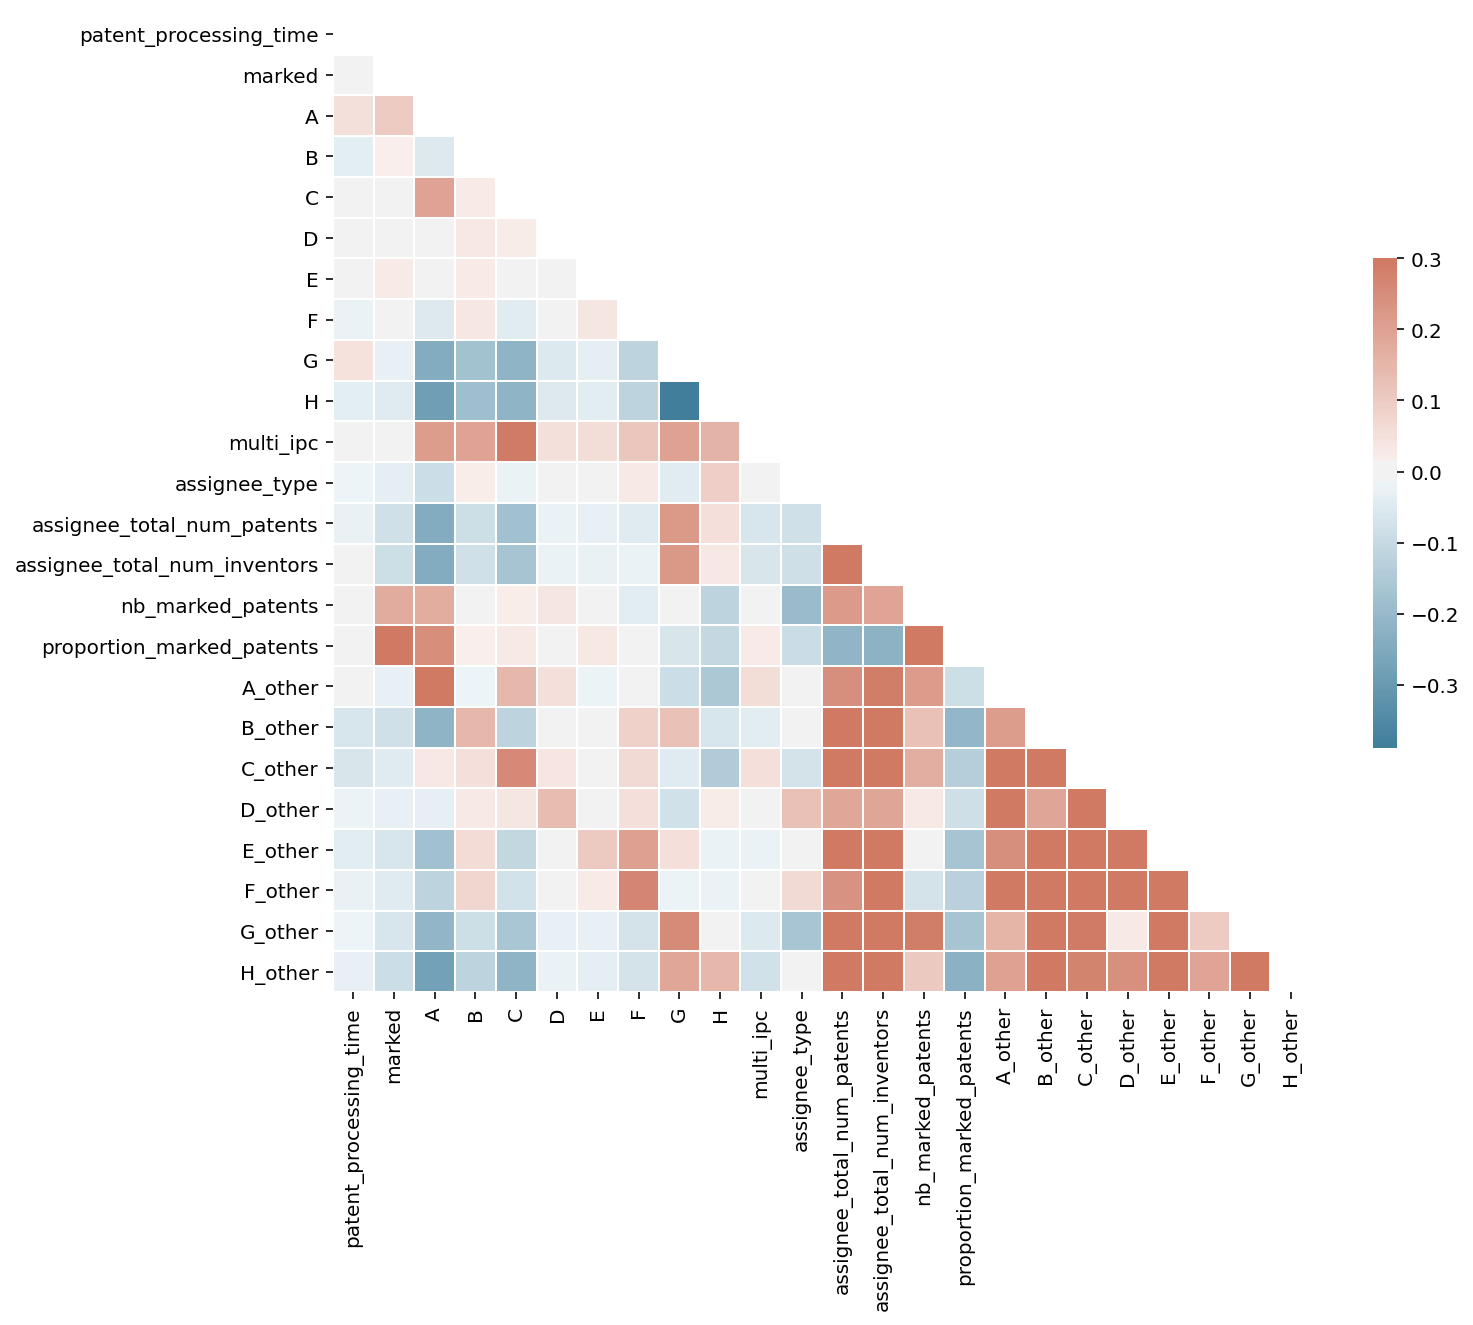

In [33]:
# Compute the correlation matrix
corr = test2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})